In [1]:
#Load Packages
import numpy as np # linear algebra
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import re
from IPython.display import display_html
import itertools
import math
import random
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib

#Load sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#Learning curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

from IPython.display import display_html
import warnings

# for inline plots
%matplotlib inline
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (8, 6)
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["axes.labelsize"] = 15
mpl.rc('xtick', labelsize = 15) 
mpl.rc('ytick', labelsize = 15)
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 2)
    
print('Libraries Imported')


Bad key savefig.frameon in file /home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.

Libraries Imported


In [2]:
import pyreadr

file_path = "../data/raw/prediction_data/aset_021120.RData"
result = pyreadr.read_r(file_path) # also works for Rds

# done! let's see what we got
# result is a dictionary where keys are the name of objects and the values python objects
print(result.keys()) # let's check what objects we got
df = result["aset"] # extract the pandas data frame for object df1

#determine sizes of datasets
n_df, m_df = df.shape

print('Data Imported')

df.to_csv("../data/raw/prediction_data/aset_021120.csv")

df

odict_keys(['aset'])
Data Imported


,pid,infected,Birth.date,Gender,age,charlson_weighted,los,nrooms,stays,icu,nantibiotics,antlist,surg_ind,surgery.quantity,ndevdiff,ndev_ind,nempdiff,nemp_ind
0,167,0.0,1972-10-12,male,48.0,2.0,4.000000,1,1.0,0.0,0.0,NaN,0.0,0,0.0,"(-1,0]",0.0,"(-1,0]"
1,353,0.0,1978-12-11,male,42.0,1.0,4.750000,4,4.0,0.0,2.0,J01DC02|J01CR02,1.0,13,0.0,"(-1,0]",6.0,"(5,150]"
2,647,0.0,1980-01-08,male,40.0,0.0,3.000000,1,1.0,0.0,0.0,NaN,1.0,2,1.0,"(0,5]",2.0,"(0,5]"
3,663,0.0,1978-06-30,female,42.0,0.0,3.666667,3,3.0,0.0,1.0,J01CR02,1.0,11,0.0,"(-1,0]",7.0,"(5,150]"
4,671,0.0,1970-05-24,male,50.0,3.0,10.000000,2,2.0,0.0,4.0,J01EE01|J01DE01|J01XB01|J01FA10,1.0,8,3.0,"(0,5]",4.0,"(0,5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87559,90912489,0.0,1942-08-25,male,78.0,0.0,4.000000,3,2.0,0.0,0.0,NaN,1.0,7,0.0,"(-1,0]",2.0,"(0,5]"
87560,90912721,0.0,1930-09-13,female,90.0,1.0,14.000000,2,1.0,0.0,1.0,J01DC02,1.0,3,1.0,"(0,5]",3.0,"(0,5]"
87561,90912730,0.0,1963-06-26,male,57.0,2.0,11.000000,3,1.0,1.0,0.0,NaN,1.0,5,1.0,"(0,5]",1.0,"(0,5]"
87562,90912810,0.0,2019-11-24,female,1.0,0.0,4.000000,2,1.0,0.0,0.0,NaN,0.0,0,0.0,"(-1,0]",0.0,"(-1,0]"


## DATA EXPLORATION

In [3]:
# determint the size of the data sets

# print a summary of loaded results
print('FULL DATA')
print('Number of features (m): %.0f'%(m_df))
print('Number of traing samples (n): %.0f'%(n_df))

# print('\n\nTest DATA')
# print('Number of features (m): %.0f'%(m_test))
# print('Number of testing samples (n): %.0f'%(n_test))

# cnt = 0
# # print out the features
# print('\n\nFeatures: ')
# for feature in X_train.columns:
#     cnt += 1
#     print('%d. '%(cnt), feature,'\t\t')


FULL DATA
Number of features (m): 18
Number of traing samples (n): 87564


In [4]:
# take a sample of what the data looks like
df = df[["infected", 'Gender', 'age', 'charlson_weighted', 'los', 'nrooms', 'stays', 'icu', 'nantibiotics', 'surg_ind','surgery.quantity']]
df.head(10)

,infected,Gender,age,charlson_weighted,los,nrooms,stays,icu,nantibiotics,surg_ind,surgery.quantity
0,0.0,male,48.0,2.0,4.000000,1,1.0,0.0,0.0,0.0,0
1,0.0,male,42.0,1.0,4.750000,4,4.0,0.0,2.0,1.0,13
2,0.0,male,40.0,0.0,3.000000,1,1.0,0.0,0.0,1.0,2
3,0.0,female,42.0,0.0,3.666667,3,3.0,0.0,1.0,1.0,11
4,0.0,male,50.0,3.0,10.000000,2,2.0,0.0,4.0,1.0,8
5,0.0,male,48.0,1.0,11.000000,2,1.0,0.0,0.0,1.0,3
6,0.0,female,42.0,0.0,8.000000,2,2.0,0.0,4.0,1.0,1
7,0.0,female,39.0,0.0,22.000000,3,1.0,1.0,1.0,1.0,13
8,0.0,female,43.0,0.0,3.000000,1,1.0,0.0,0.0,1.0,1
9,0.0,male,38.0,2.0,85.500000,10,4.0,1.0,2.0,1.0,63


### Helper Functions

In [5]:
#sets up the parametes for plotting.. size and font
def PlotParams(Font, sizex, sizey):
    mpl.rcParams['figure.figsize'] = (sizex, sizey)
    plt.rcParams["legend.fontsize"] = Font
    plt.rcParams["axes.labelsize"] = Font
    mpl.rc('xtick', labelsize = Font) 
    mpl.rc('ytick', labelsize = Font)

#sets up Seaborn parametes for plotting
def snsParams(font, colour_scheme):
    #eaborn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    sns.set(style = 'whitegrid', palette = colour_scheme, font_scale = font)

#determined ht emissing data
def Missing(X):
    total = X.isnull().sum().sort_values(ascending = False)
    percent = round(X.isnull().sum().sort_values(ascending = False)/len(X)*100, 2)
    missing = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return(missing) 

#plots number of dataframes side by side
def SideSide(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)

#makes heat map of correlations
def PlotCorr(X):
    corr = X.corr()
    #fig , ax = plt.figure( figsize = (6,6 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    sns.heatmap(
        corr, cmap = cmap, square = True, cbar = False, cbar_kws = { 'shrink' : 1 }, 
     annot = True, annot_kws = { 'fontsize' : 14 }
    )
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 90) 
    
#plot top correlatins in a heat map
def TopCorr(X, lim):
    corr = X.corr()
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    #fig , ax = plt.subplots( figsize = (6,6 ) )
    sns.heatmap(corr[(corr >= lim) | (corr <= -lim)], 
         vmax = 1.0,  cmap = cmap, vmin = -1.0, square = True, cbar = False, linewidths = 0.2, annot = True, 
                annot_kws = {"size": 14})
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 90)

In [6]:
# provide information about the types of data we are dealing with
print('ORIGINAL TRAINING DATA:')
df.info()
    

ORIGINAL TRAINING DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87564 entries, 0 to 87563
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   infected           87564 non-null  float64 
 1   Gender             87564 non-null  category
 2   age                87564 non-null  float64 
 3   charlson_weighted  87564 non-null  float64 
 4   los                87564 non-null  float64 
 5   nrooms             87564 non-null  int32   
 6   stays              87564 non-null  float64 
 7   icu                87564 non-null  float64 
 8   nantibiotics       87564 non-null  float64 
 9   surg_ind           87564 non-null  float64 
 10  surgery.quantity   87564 non-null  int32   
dtypes: category(1), float64(8), int32(2)
memory usage: 6.1 MB


the floats will need to be converted into int64 values, some of the objects (e.g. sex) will ned to be converted into numberics, all NaN and null values will need to be filled, 

In [7]:
df.describe(include = "all")

,infected,Gender,age,charlson_weighted,los,nrooms,stays,icu,nantibiotics,surg_ind,surgery.quantity
count,87564.000000,87564,87564.000000,87564.000000,87564.000000,87564.000000,87564.000000,87564.000000,87564.000000,87564.000000,87564.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,44617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.006064,NaN,52.584761,1.247328,9.763766,2.745592,1.419784,0.120483,0.908867,0.876308,6.704730
std,0.077637,NaN,27.219239,2.106109,12.737211,2.439074,1.019838,0.325528,1.454198,0.329232,9.211745
min,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,33.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,NaN,58.000000,0.000000,6.500000,2.000000,1.000000,0.000000,0.000000,1.000000,4.000000
75%,0.000000,NaN,75.000000,2.000000,10.333333,3.000000,1.000000,0.000000,1.000000,1.000000,8.000000


### Missing Data

as can be seen from the above data, there are several featured with NaN missing values. Lets take a look at the features that have missing values missing

TRAIN DATA 		 TEST DATA


,Total,Percent
surgery.quantity,0,0.0
surg_ind,0,0.0
nantibiotics,0,0.0
icu,0,0.0
stays,0,0.0
nrooms,0,0.0
los,0,0.0
charlson_weighted,0,0.0
age,0,0.0
Gender,0,0.0


MISSING DATA


<AxesSubplot:>

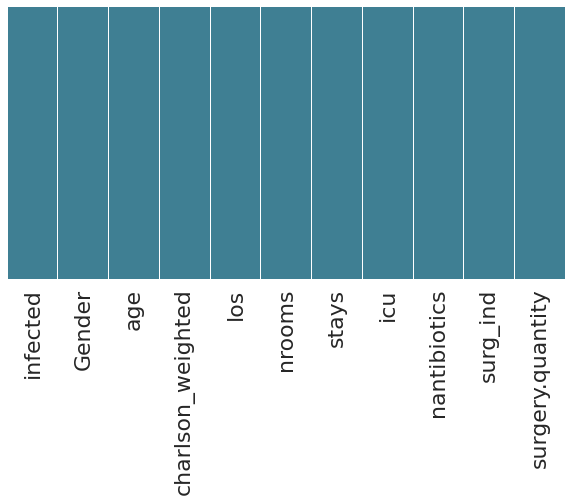

In [8]:
# Fill empty values with NaN
df = df.fillna(np.nan)

#finds missing values
missing_df = Missing(df)
    
print('TRAIN DATA','\t\t','TEST DATA')
SideSide(missing_df)

#plot missing data in heatmap for visualisation
print('MISSING DATA')
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize = (10,5))
plt.subplot(1, 1, 1)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = cmap)

### Feature Correlation


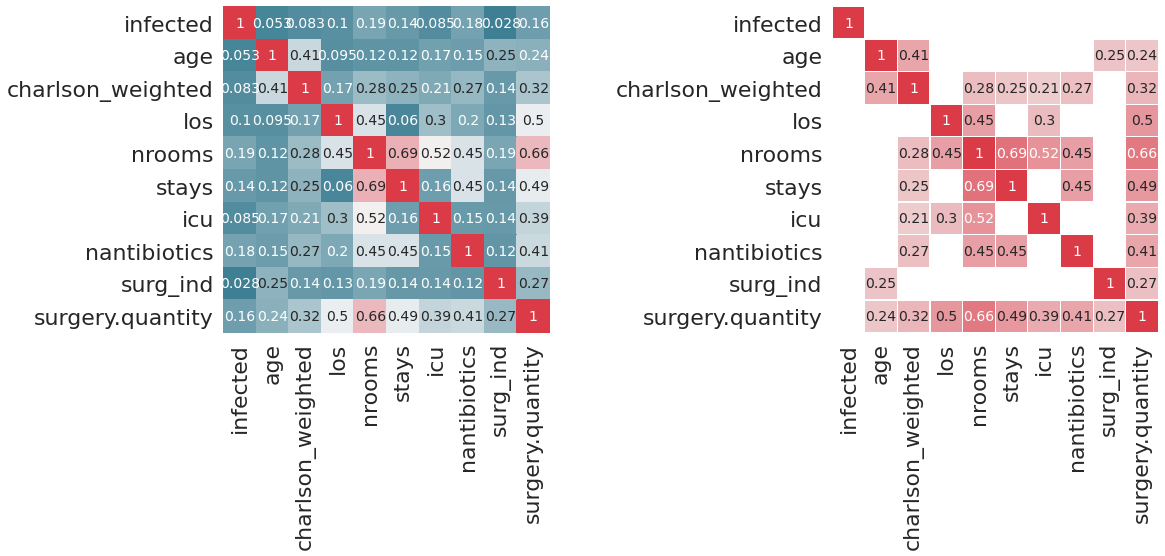

In [9]:
#show the correlations between all the featured in a heatmap
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
PlotCorr(df);
plt.subplot(1,2,2)
TopCorr(df, 0.2)

In [10]:
# highest correlated with correlation of features with 'Survived'
print('Featured hights correlation with infection')
print('Feature\tCorrelation')
infected_corr = df.corr()["infected"]
infected_corr = infected_corr[1:9] # remove the 'infected'
infected_corr= infected_corr[np.argsort(infected_corr, axis = 0)[::-1]] #sort in descending order
print(infected_corr)

Featured hights correlation with infection
Feature	Correlation
nrooms               0.190343
nantibiotics         0.178883
stays                0.140214
los                  0.100696
icu                  0.084964
charlson_weighted    0.083371
age                  0.052721
surg_ind             0.028452
Name: infected, dtype: float64


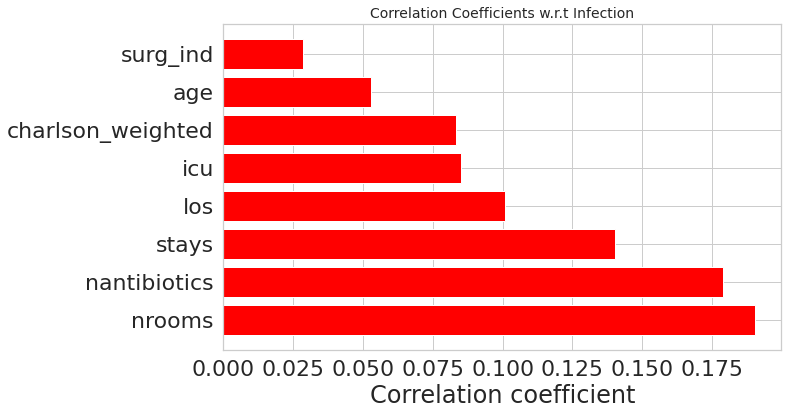

In [11]:
# Plot the top correlationin a bar chart for east visualisation.
width = 0
fig, ax = plt.subplots(figsize = (10,6))
rects = ax.barh(np.arange(len(infected_corr)), np.array(infected_corr.values), color = 'red')
ax.set_yticks(np.arange(len(infected_corr)) + ((width)/1))
ax.set_yticklabels(infected_corr.index, rotation ='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Infection",fontsize = 14);
ax.grid(True)

### Infection by Gender

<AxesSubplot:xlabel='Gender', ylabel='infected'>

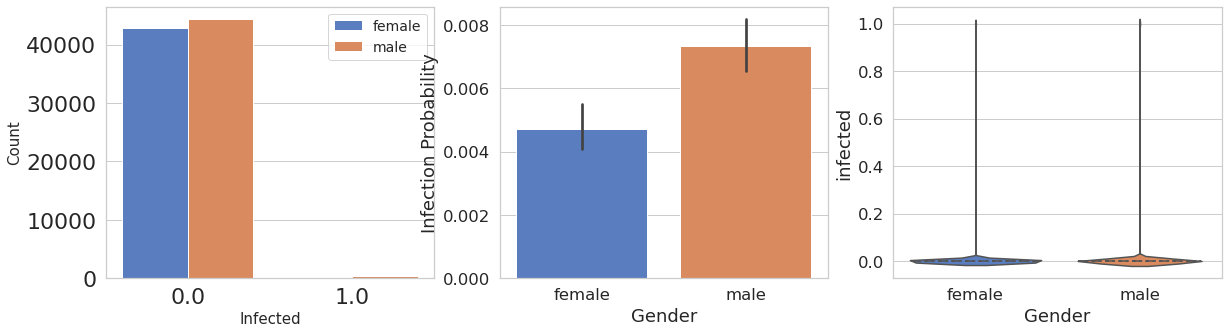

In [12]:
snsParams(2, 'muted')
# plot infection count for male and female
plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
b = sns.countplot(x = 'infected',hue = 'Gender', data = df)
b.set_xlabel("Infected",fontsize = 15)
b.set_ylabel("Count",fontsize = 15)
b.legend(fontsize = 14)
snsParams(1.5, 'muted')

# infection probability of males and females
plt.subplot(1, 3, 2)
g = sns.barplot(x = "Gender", y = "infected",data = df)
g = g.set_ylabel("Infection Probability")

plt.subplot(1, 3, 3)
sns.violinplot(y = 'infected', x = 'Gender', data = df, inner = 'quartile')


### Infection by Age

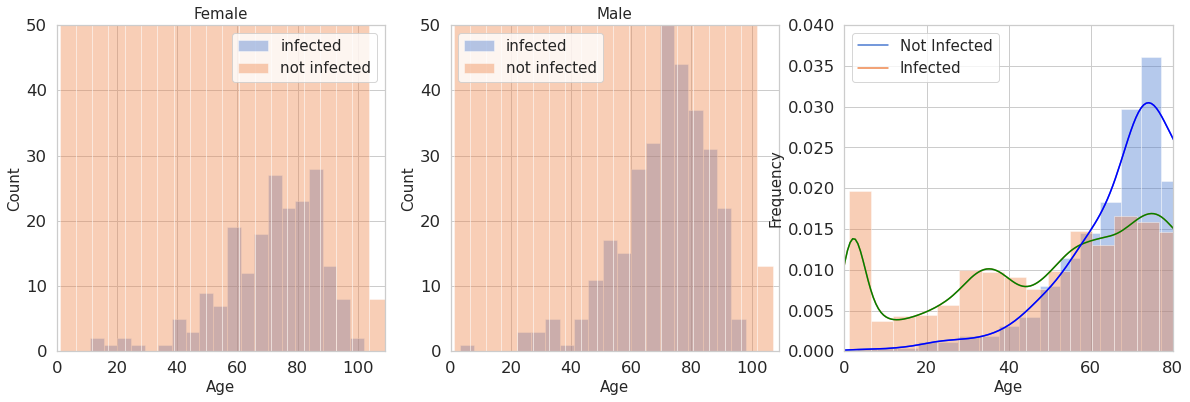

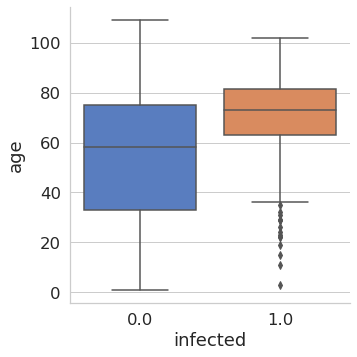

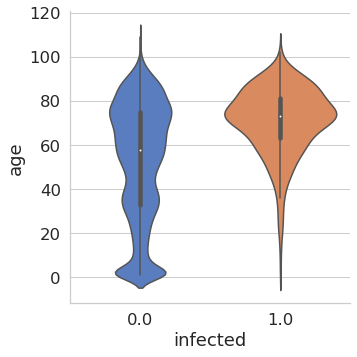

In [13]:
# plot survival number for age dependandcy
fig, axes = plt.subplots(figsize = (20,6), nrows = 1, ncols = 3)

g = sns.distplot(df[df['infected'] == 1].age.dropna(), bins=20, label = 'Infected')
g = sns.distplot(df[df['infected'] == 0].age.dropna(), bins=20, label = 'Not Infected')

g = sns.kdeplot(df["age"][(df["infected"] == 0) & (df["age"].notnull())], color = "Green", shade = False)
g = sns.kdeplot(df["age"][(df["infected"] == 1) & (df["age"].notnull())], ax = g, color = "Blue", shade= False)

g.set_xlabel("Age",fontsize = 15)
g.set_ylabel("Frequency",fontsize = 15)
g = g.legend(["Not Infected","Infected"],fontsize = 15)
plt.xlim(0,80)
plt.ylim(0,0.04)
plt.grid(True)

women = df[df['Gender'] == 'female']
men = df[df['Gender'] == 'male']

#For womwn
ax = sns.distplot(women[women['infected'] == 1].age.dropna(), bins = 20, label = 'infected', ax = axes[0], kde = False)
ax = sns.distplot(women[women['infected'] == 0].age.dropna(), bins = 20, label = 'not infected', ax = axes[0], kde = False)
ax.set_xlabel("Age",fontsize = 15)
ax.set_ylabel("Count",fontsize = 15)
ax.legend(fontsize = 15)
ax.set_title('Female', fontsize = 15)
ax.set(xlim = (0, df['age'].max()));
ax.set(ylim = (0, 50));
    
    
#For men
ax = sns.distplot(men[men['infected'] == 1].age.dropna(), bins = 20, label = 'infected', ax = axes[1], kde = False)
ax = sns.distplot(men[men['infected'] == 0].age.dropna(), bins = 20, label = 'not infected', ax = axes[1], kde = False)
ax.set_xlabel("Age",fontsize = 15)
ax.set_ylabel("Count",fontsize = 15)
ax.legend(fontsize = 15)
ax.set_title('Male', fontsize = 15)
ax.set(xlim = (0, df['age'].max()))
ax.set(ylim = (0, 50));

g = sns.factorplot(x = "infected", y = "age",data = df, kind="box")
g = sns.factorplot(x = "infected", y = "age",data = df, kind="violin")



### Charlson Score

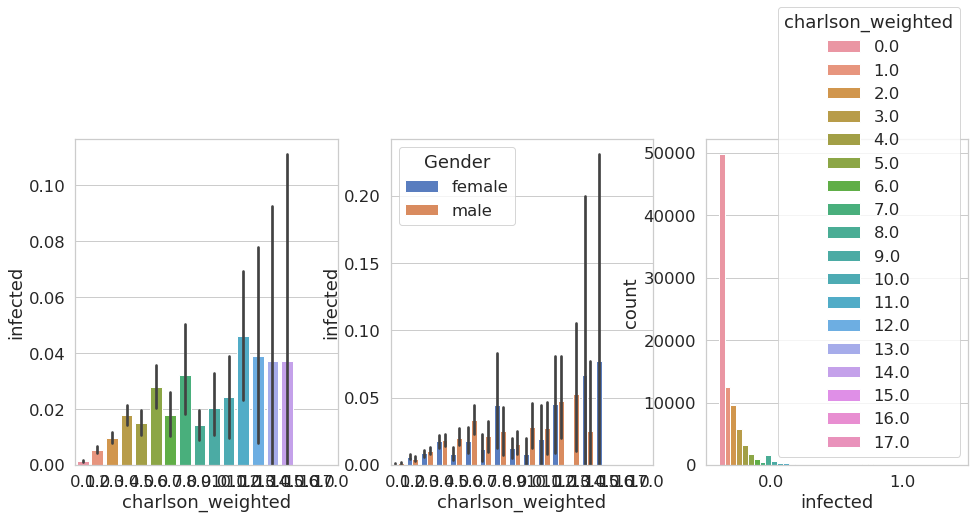

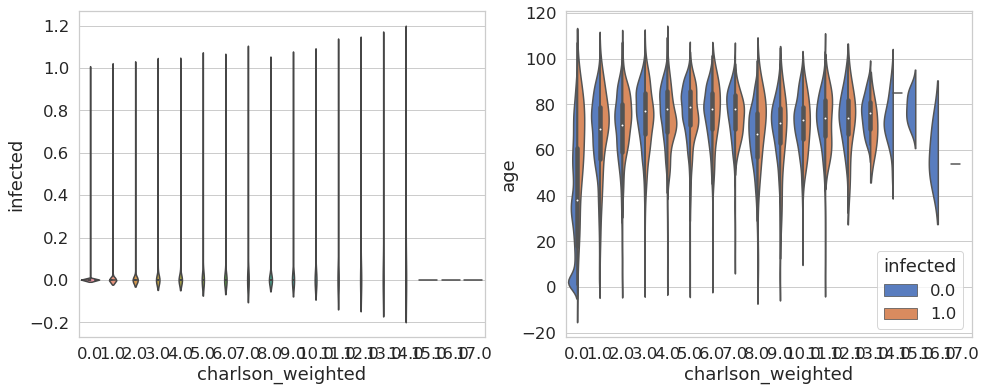

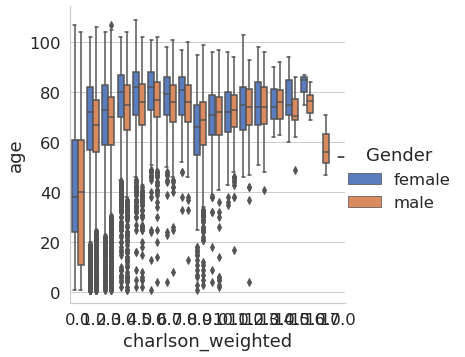

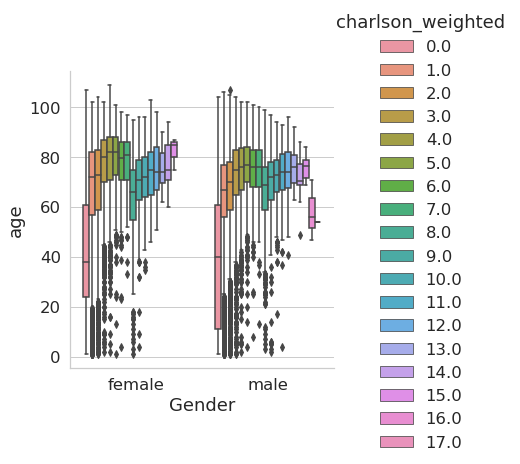

In [14]:
plt.figure(figsize = (16,6))
plt.subplot(1, 3, 1)
sns.barplot(x = 'charlson_weighted', y = 'infected', data = df)

# Explore charlson_weighted vs infected by gender
plt.subplot(1, 3, 2)
g = sns.barplot(x = "charlson_weighted", y = "infected", hue = "Gender", data = df)

plt.subplot(1, 3, 3)
sns.countplot(x = 'infected',hue = 'charlson_weighted',data = df);

plt.figure(figsize = (16,6))
plt.subplot(1, 2, 1)
sns.violinplot(y = 'infected', x = 'charlson_weighted', data = df, inner = 'quartile')
plt.subplot(1, 2, 2)
sns.violinplot(x='charlson_weighted', y = 'age', hue = 'infected', data = df, split = True)


ax = sns.factorplot(y = "age", x = "charlson_weighted", hue = "Gender", data = df, kind = "box")
sns.factorplot(y = "age", x = "Gender", hue = "charlson_weighted", data = df, kind = "box")


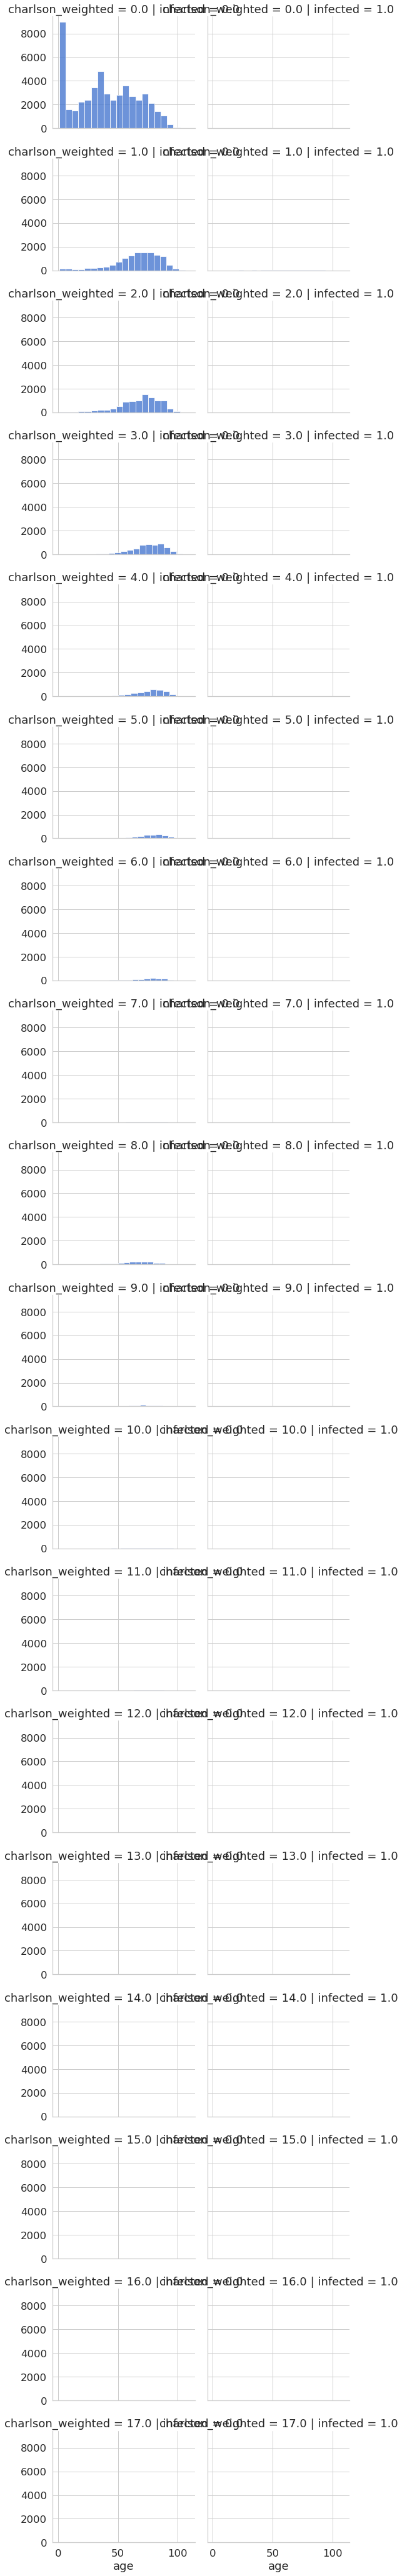

In [15]:
grid = sns.FacetGrid(df, col = 'infected', row = 'charlson_weighted', size = 3.2, aspect = 1.2)
grid.map(plt.hist, 'age', alpha = 0.8, bins=20)
grid.add_legend();

# Number of Rooms

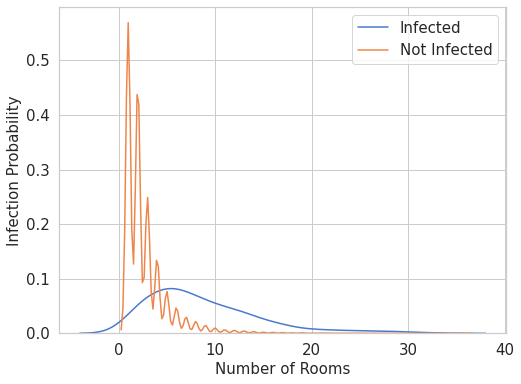

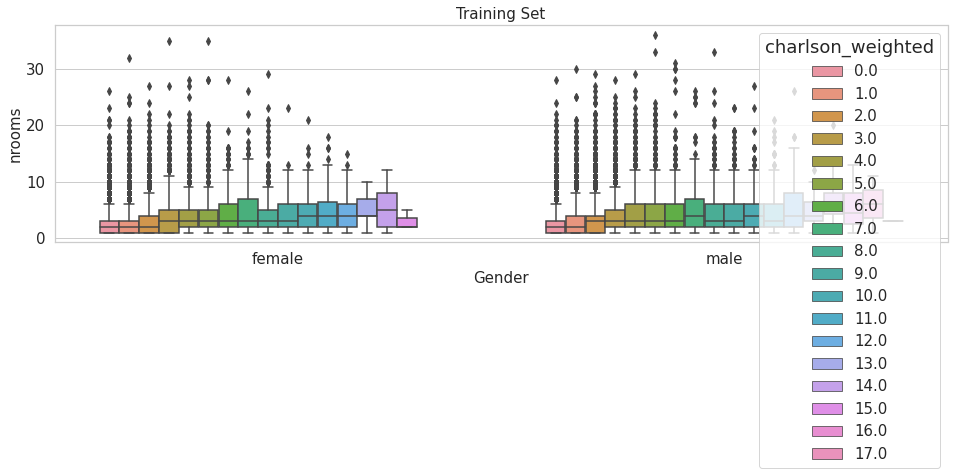

In [16]:
PlotParams(15, 8, 6)
plt.figure()
sns.kdeplot(df["nrooms"][df.infected == 1])
sns.kdeplot(df["nrooms"][df.infected == 0])
plt.legend(['Infected', 'Not Infected'])
plt.xlabel('Number of Rooms')
plt.ylabel('Infection Probability')
# limit x axis to zoom on most information. there are a few outliers in fare. 
# plt.xlim(0,200)
# plt.ylim(0,.060)
plt.show()


fig, ax = plt.subplots(figsize=(16,4),ncols=1)
ax1 = sns.boxplot(x = "Gender", y = "nrooms", hue = "charlson_weighted", data = df, ax = ax)
ax1.set_title("Training Set", fontsize = 15)
fig.show()

# Prepare train and test set

In [17]:
df.Gender = pd.Categorical(df.Gender)
df['Gender'] = df.Gender.cat.codes

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [19]:
# rebalance train dataset
max_size = train['infected'].value_counts().max()
lst = [train]
for class_index, group in train.groupby('infected'):
    lst.append(group.sample(max_size-len(group), replace=True))
train = pd.concat(lst)

# rebalance test dataset
max_size = test['infected'].value_counts().max()
lst = [test]
for class_index, group in test.groupby('infected'):
    lst.append(group.sample(max_size-len(group), replace=True))
test = pd.concat(lst)

In [20]:
print(len(train[train['infected'] == 1.0]))
print(len(train[train['infected'] == 0.0]))

print(len(test[test['infected'] == 1.0]))
print(len(test[test['infected'] == 0.0]))

69737
69737
17296
17296


In [21]:
X_train = pd.DataFrame(train.iloc[:,1: len(df.columns)])
y_train = pd.DataFrame(train.iloc[0:, 0])

In [22]:
X_train

,Gender,age,charlson_weighted,los,nrooms,stays,icu,nantibiotics,surg_ind,surgery.quantity
0,1,48.0,2.0,4.000000,1,1.0,0.0,0.0,0.0,0
1,1,42.0,1.0,4.750000,4,4.0,0.0,2.0,1.0,13
2,1,40.0,0.0,3.000000,1,1.0,0.0,0.0,1.0,2
3,0,42.0,0.0,3.666667,3,3.0,0.0,1.0,1.0,11
4,1,50.0,3.0,10.000000,2,2.0,0.0,4.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...
42810,0,85.0,8.0,28.000000,6,1.0,1.0,0.0,1.0,13
53334,1,83.0,2.0,61.000000,8,1.0,1.0,0.0,1.0,20
19647,0,89.0,4.0,16.250000,4,4.0,0.0,6.0,1.0,30
65854,1,56.0,1.0,26.000000,6,1.0,1.0,1.0,1.0,14


In [23]:
y_train

,infected
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
42810,1.0
53334,1.0
19647,1.0
65854,1.0


In [24]:
X_test = pd.DataFrame(test.iloc[:,1: len(df.columns)])
y_test = pd.DataFrame(test.iloc[0:, 0])

## PREDICTION MODELS

in the following section several classification methods with be tested to determine which is the best, logistical Regression, Stochastic Gradient Descent, Random Forest, Support Vector Machine, K-Nearest Neighbour, Gausssian Naive Bayes, Multi-Layer Perceptron, Linear Support Vector Machine, Decisison Tree.

In [25]:
n_cores = 16 -1
# grid search
def GridSearchModel(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)
    
# Learning curve
def LearningCurve(X, y, model, cv, train_sizes):

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = cv, n_jobs = n_cores, 
                                                            train_sizes = train_sizes)

    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std  = np.std(train_scores, axis = 1)
    test_scores_mean  = np.mean(test_scores, axis = 1)
    test_scores_std   = np.std(test_scores, axis = 1)
    
    train_Error_mean = np.mean(1- train_scores, axis = 1)
    train_Error_std  = np.std(1 - train_scores, axis = 1)
    test_Error_mean  = np.mean(1 - test_scores, axis = 1)
    test_Error_std   = np.std(1 - test_scores, axis = 1)

    Scores_mean = np.mean(train_scores_mean)
    Scores_std = np.mean(train_scores_std)
    
    _, y_pred, Accuracy, Error, precision, recall, f1score = ApplyModel(X, y, model)
    
    plt.figure(figsize = (16,4))
    plt.subplot(1,2,1)
    ax1 = Confuse(y, y_pred, classes)
    plt.subplot(1,2,2)
    plt.fill_between(train_sizes, train_Error_mean - train_Error_std,train_Error_mean + train_Error_std, alpha = 0.1,
                     color = "r")
    plt.fill_between(train_sizes, test_Error_mean - test_Error_std, test_Error_mean + test_Error_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_Error_mean, 'o-', color = "r",label = "Training Error")
    plt.plot(train_sizes, test_Error_mean, 'o-', color = "g",label = "Cross-validation Error")
    plt.legend(loc = "best")
    plt.grid(True)
     
    return (model, Scores_mean, Scores_std )

def ApplyModel(X, y, model):
    
    model.fit(X, y)
    y_pred  = model.predict(X)

    Accuracy = round(np.median(cross_val_score(model, X, y, cv = cv, n_jobs = n_cores)), 2) * 100
 
    Error   = 1 - Accuracy
    
    precision = precision_score(y_train, y_pred) * 100
    recall = recall_score(y_train, y_pred) * 100
    f1score = f1_score(y_train, y_pred) * 100
    
    return (model, y_pred, Accuracy, Error, precision, recall, f1score)

def get_scores(y_true, y_pred):
    
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1score = f1_score(y_true, y_pred) * 100
    
    return {"accuracy": accuracy, "precision": precision, "recall":recall, "f1score": f1score}
    
def Confuse(y, y_pred, classes):
    cnf_matrix = confusion_matrix(y, y_pred)
    
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis = 1)[:, np.newaxis]
    c_train = pd.DataFrame(cnf_matrix, index = classes, columns = classes)  

    ax = sns.heatmap(c_train, annot = True, cmap = cmap, square = True, cbar = False, 
                          fmt = '.2f', annot_kws = {"size": 20})
    return(ax, c_train)

def PrintResults(model, X, y, title):
    
    model, y_pred, Accuracy, Error, precision, recall, f1score = ApplyModel(X, y, model)
    
    _, Score_mean, Score_std = LearningCurve(X, y, model, cv, train_size)
    Score_mean, Score_std = Score_mean*100, Score_std*100
    
    
    print('Scoring Accuracy: %.2f %%'%(Accuracy))
    print('Scoring Mean: %.2f %%'%(Score_mean))
    print('Scoring Standard Deviation: %.4f %%'%(Score_std))
    print("Precision: %.2f %%"%(precision))
    print("Recall: %.2f %%"%(recall))
    print('f1-score: %.2f %%'%(f1score))
    
    Summary = pd.DataFrame({'Model': title,
                       'Accuracy': Accuracy, 
                       'Score Mean': Score_mean, 
                       'Score St Dv': Score_std, 
                       'Precision': precision, 
                       'Recall': recall, 
                       'F1-Score': f1score}, index = [0])
    return (model, Summary)

In [26]:
classes = ['Infected', 'Not Infected']
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0)
train_size = np.linspace(0.1, 1.0, 15)

Results will be printed and sumarised using the follow parameters

* Confusion Matrix:
   *  True Negatives: passengers were correctly classified as not survived 
   *  False positives: where wrongly classified as not survived 
   *  True postivies: correctly classified as survived 
   *  False negative: passengers where wrongly classified as survived 
* Precision
* Recall
* F-Score: The F-score is computed with the harmonic mean of precision and recall. 
* OOB: out-of-bag samples to estimate the generalization accuracy.


Learning curves allow us to diagnose if the model is overfitting or underfitting.


OVERFITTING:
When the model overfits, it means that it performs well on the training set, but not not on the validation set. Accordingly, the model is not able to generalize to unseen data. If the model is overfitting, the learning curve will present a gap between the training and validation scores. Two common solutions for overfitting are reducing the complexity of the model and/or collect more data.
    
    
UNDERFITTING: 
underfitting means that the model is not able to perform well in either training or validations sets. In those cases, the learning curves will converge to a low score value. When the model underfits, gathering more data is not helpful because the model is already not being able to learn the training data. Therefore, the best approaches for these cases are to improve the model (e.g., tuning the hyperparameters) or to improve the quality of the data (e.g., collecting a different set of features).


Scoring Accuracy: 86.00 %
Scoring Mean: 92.72 %
Scoring Standard Deviation: 0.1306 %
Precision: 87.11 %
Recall: 85.83 %
f1-score: 86.47 %
{'accuracy': 84.22467622571693, 'precision': 86.66006069238867, 'recall': 80.90309898242369, 'f1score': 83.68268396973956}


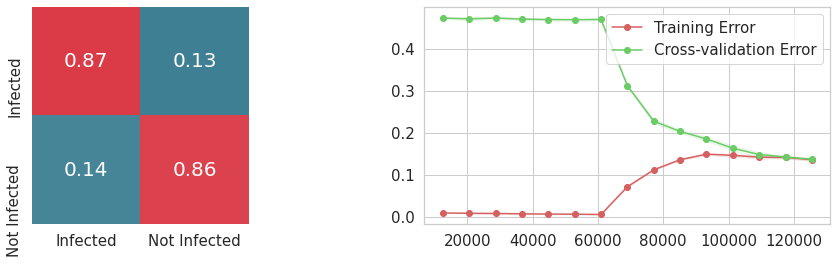

In [27]:
# Logistic Regression
model = LogisticRegression()
model, Summary_LR = PrintResults(model, X_train, y_train, 'Logistic Regression')
y_train_LR = pd.Series(model.predict(X_train), name = "LR")
y_test_LR = pd.Series(model.predict(X_test), name = "LR")
print(get_scores(y_test, y_test_LR))

Scoring Accuracy: 84.00 %
Scoring Mean: 91.86 %
Scoring Standard Deviation: 0.4185 %
Precision: 85.40 %
Recall: 83.57 %
f1-score: 84.48 %
{'accuracy': 81.98716466234967, 'precision': 83.82757566493427, 'recall': 79.26688251618872, 'f1score': 81.48346260140859}


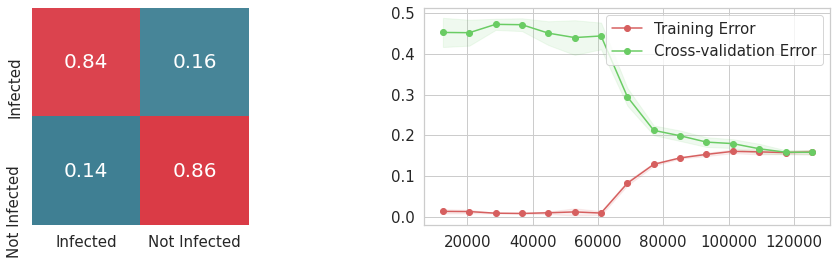

In [28]:
# stochastic gradient descent (SGD) learning
model = linear_model.SGDClassifier(max_iter = 200, tol = None)
model, Summary_SGD = PrintResults(model, X_train, y_train, 'SGD')
y_train_SGD = pd.Series(model.predict(X_train), name = "SGD")
y_test_SGD = pd.Series(model.predict(X_test), name = "SGD")
print(get_scores(y_test, y_test_SGD))

Scoring Accuracy: 95.00 %
Scoring Mean: 96.82 %
Scoring Standard Deviation: 0.1024 %
Precision: 91.44 %
Recall: 98.60 %
f1-score: 94.89 %
{'accuracy': 82.65205827937095, 'precision': 88.84379943599973, 'recall': 74.68200740055504, 'f1score': 81.1496780273284}


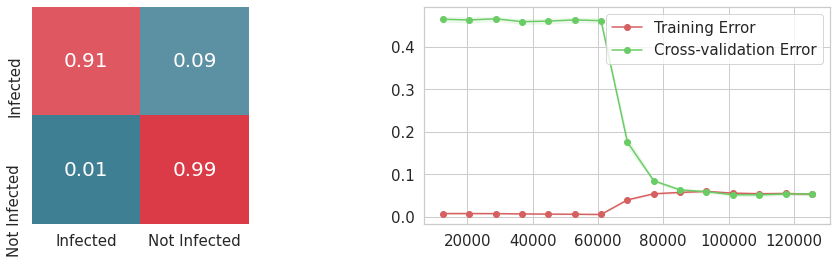

In [29]:
# Random Forest
model = RandomForestClassifier(n_estimators = 10, max_depth=8)
model, Summary_RF = PrintResults(model, X_train,y_train, 'Random Forest')
y_train_RF = pd.Series(model.predict(X_train), name = "RF")
y_test_RF = pd.Series(model.predict(X_test), name = "RF")
print(get_scores(y_test, y_test_RF))

In [30]:
# # SVM
# model = SVC()
# model, Summary_SVM = PrintResults(model, X_train, y_train, 'SVM')
# y_train_SVM = pd.Series(model.predict(X_train), name = "SVM")
# y_test_SVM = pd.Series(model.predict(X_test), name = "SVM")
# print(get_scores(y_test, y_test_SVM))

Scoring Accuracy: 99.00 %
Scoring Mean: 99.47 %
Scoring Standard Deviation: 0.0106 %
Precision: 99.47 %
Recall: 100.00 %
f1-score: 99.73 %
{'accuracy': 57.45259019426457, 'precision': 93.6357481381178, 'recall': 15.99213691026827, 'f1score': 27.31851851851852}


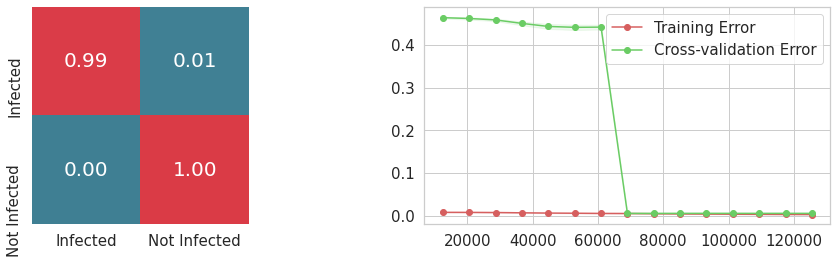

In [31]:
# KNN
model = KNeighborsClassifier(n_neighbors = 3)
model, Summary_KNN = PrintResults(model, X_train, y_train,'KNN')
y_train_KNN = pd.Series(model.predict(X_train), name = "KNN")
y_test_KNN = pd.Series(model.predict(X_test), name = "KNN")
print(get_scores(y_test, y_test_KNN))

In [32]:
# # Gaussian Naive Bayes
# model = GaussianNB()
# model, Summary_GNB = PrintResults(model, X_train, y_train, "GNB")
# y_train_GNB = pd.Series(model.predict(X_train), name = "GNB")
# y_test_GNB = pd.Series(model.predict(X_test), name = "GNB")
# print(get_scores(y_test, y_test_GNB))

In [33]:
# # Perceptron
# model = Perceptron(max_iter = 5)
# model, Summary_MLP = PrintResults(model, X_train, y_train, 'MLP')
# y_train_MLP = pd.Series(model.predict(X_train), name = "MLP")
# y_test_MLP = pd.Series(model.predict(X_test), name = "MLP")
# print(get_scores(y_test, y_test_MLP))

In [34]:
# # Linear SVC
# model = LinearSVC()
# model, Summary_LSVM = PrintResults(model, X_train, y_train,"LSVM")
# y_train_LSVM = pd.Series(model.predict(X_train), name = "LSVM")
# y_test_LSVM = pd.Series(model.predict(X_test), name = "LSVM")
# print(get_scores(y_test, y_test_LSVM))

Scoring Accuracy: 95.00 %
Scoring Mean: 97.25 %
Scoring Standard Deviation: 0.0841 %
Precision: 92.06 %
Recall: 100.00 %
f1-score: 95.87 %
{'accuracy': 77.88216928769658, 'precision': 87.95749704840614, 'recall': 64.61031452358927, 'f1score': 74.4975167494417}


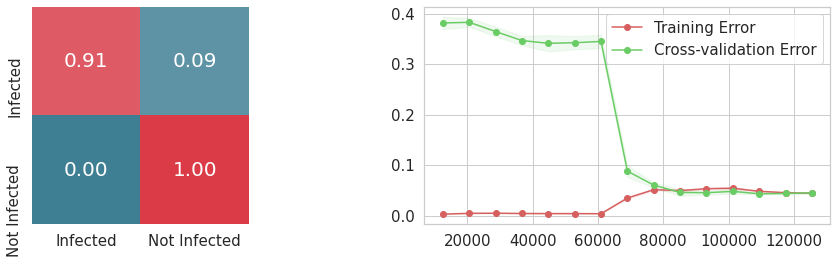

In [35]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=10)
model, Summary_DT = PrintResults(model, X_train, y_train, 'DT')
y_train_DT = pd.Series(model.predict(X_train), name = "DT")
y_test_DT = pd.Series(model.predict(X_test), name = "DT")
print(get_scores(y_test, y_test_DT))

In [36]:
# # Which is the best model?
# Class_Results = pd.concat([Summary_LR, Summary_SGD, Summary_RF, 
#                            Summary_SVM, Summary_KNN, Summary_GNB,
#                            Summary_MLP, Summary_LSVM, Summary_DT], ignore_index = True)
    

# Class_Results = Class_Results.sort_values(by = 'Accuracy', ascending=False)
# Class_Results = Class_Results.set_index('Accuracy')
# Class_Results.head(10)


In [37]:
# # Concatenate all classifier results
# y_test_Results = pd.concat([y_test_LR, y_test_SGD, y_test_RF, y_test_SVM, y_test_KNN,y_test_GNB,
#                               y_test_MLP, y_test_LSVM, y_test_DT], axis=1)

# y_train_Results = pd.concat([y_train_LR, y_train_SGD, y_train_RF, y_train_SVM, y_train_KNN, y_train_GNB,
#                               y_train_MLP, y_train_LSVM, y_train_DT], axis=1)

# plt.figure(figsize = (14, 7))
# plt.subplot(1,2,1)
# PlotCorr(y_train_Results)
# plt.title('Training data')
# plt.subplot(1,2,2)
# PlotCorr(y_test_Results)
# plt.title('Test data')

## Closer Look at Random Forest

From the above analysis the Random Forest algorithm provides good results (Score, precision, recall, f-score). so lets take a closer look at this to see if even further improvements can be made.

Sklearn measure a features importance by looking at how much the tree nodes, that use that feature, reduce impurity on average (across all trees in the forest).

In [38]:
# Random Forest
model = RandomForestClassifier(n_estimators = 10, max_depth=10, oob_score = True)
model, y_pred, Accuracy, Error, precision, recall, f1score = ApplyModel(X_train, y_train, model)
Priority = pd.DataFrame({'Feature': X_train.columns,'Importance':np.round(model.feature_importances_,3)})
Priority  = Priority.sort_values('Importance', ascending = False).set_index('Feature')

In [39]:
Priority.head(15)

,Importance
Feature,
nantibiotics,0.283
los,0.237
nrooms,0.136
surgery.quantity,0.127
age,0.082
stays,0.080
charlson_weighted,0.038
Gender,0.009
icu,0.008


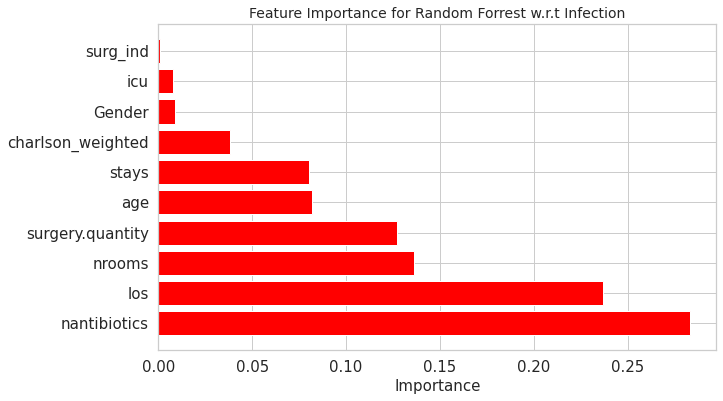

In [40]:
width = 0
fig, ax = plt.subplots(figsize = (10,6))
rects = ax.barh(np.arange(len(Priority)), np.array(Priority.values).reshape(-1), color = 'red')
ax.set_yticks(np.arange(len(Priority)) + ((width)/1))
ax.set_yticklabels(Priority.index, rotation ='horizontal')
ax.set_xlabel("Importance")
ax.set_title("Feature Importance for Random Forrest w.r.t Infection",fontsize = 14);
ax.grid(True)

A general rule is that the more features you have, the more likely your model will suffer from overfitting. Below dropped features don't play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. 

In [41]:
X_train = X_train.drop("surg_ind", axis = 1) 
X_train = X_train.drop("icu", axis = 1)
X_train = X_train.drop("Gender", axis = 1)
X_train = X_train.drop("stays", axis = 1)

X_test = X_test.drop("surg_ind", axis = 1) 
X_test = X_test.drop("icu", axis = 1)
X_test = X_test.drop("Gender", axis = 1)
X_test = X_test.drop("stays", axis = 1)

Scoring Accuracy: 96.00 %
Scoring Mean: 97.97 %
Scoring Standard Deviation: 0.0928 %
Precision: 93.51 %
Recall: 100.00 %
f1-score: 96.64 %
oob score: 95.47 %
{'accuracy': 52.54104995374653, 'precision': 93.9060939060939, 'recall': 5.434782608695652, 'f1score': 10.274908454937966}


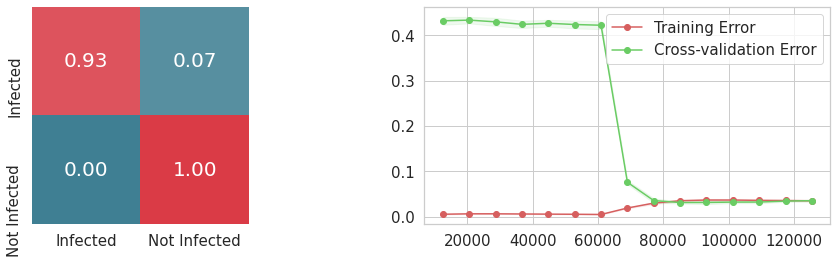

In [68]:
# Random Forest again after dropping parameters

model = RandomForestClassifier(n_estimators = 10, max_depth=10, oob_score = True)
_, Summary_RF = PrintResults(model, X_train,y_train,'Random Forest')
y_test_RF = pd.Series(model.predict(X_test), name = "Infected")
print("oob score:", round(model.oob_score_, 4) * 100, "%")
print(get_scores(y_test, y_test_pred))

Our random forest model predicts the same as before. Dropping the features did not make much of a difference except to decrease the stdv

Confusion Matrix: 
95% passengers were correctly classified as not survived (called true negatives),
5% where wrongly classified as not survived (false positives).
85% 249 where correctly classified as survived (true positives).
15% were passengers where wrongly classified as survived (false negatives)

Precision:
Our model predicts 91% of the time, a passengers survival correctly  

Recall: The recall tells us that it predicted the survival of 85 % of the people who actually survived.

F-Score: The F-score is computed with the harmonic mean of precision and recall. 

OOB: out-of-bag samples to estimate the generalization accuracy.

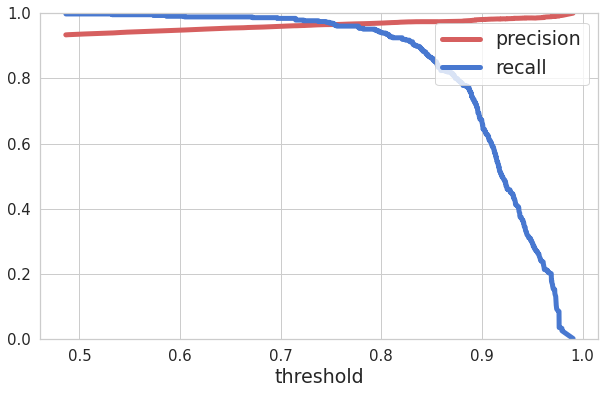

In [69]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label = "precision", linewidth = 5)
    plt.plot(threshold, recall[:-1], "b", label = "recall", linewidth = 5)
    plt.xlabel("threshold", fontsize = 19)
    plt.legend(loc = "upper right", fontsize = 19)
    plt.ylim([0, 1])
    
    
# getting the probabilities of our predictions
y_scores = model.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
plt.figure(figsize = (10, 6))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. Because of that you may want to select the precision/recall tradeoff before that - maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.



### Hyperparameter Tuning

Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

I put this code into a comments because it takes a long time to run it. 

In [55]:
#this section is commented out as it takes too long to run. the results are shown at the bottom

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.model_selection import GridSearchCV

# # Choose the type of classifier. 
# model = RandomForestClassifier()

# # Choose some parameter combinations to try
# parameters = {'n_estimators': [10,100,200,400,600], 
#              'max_features': ['log2', 'sqrt','auto'], 
#              'criterion': ['entropy', 'gini'],
#              'max_depth': [2, 3, 5, 7, 10, 15, 20], 
#              'min_samples_split': [2, 3, 5, 10, 20, 30],
#              'min_samples_leaf': [1,5,10,20,30,50]
#             }

# # Type of scoring used to compare parameter combinations
# acc_scorer = make_scorer(accuracy_score)

# # Run the grid search
# grid_obj = GridSearchCV(model, parameters, scoring = acc_scorer, n_jobs = n_cores, verbose = 1)
# grid_obj = grid_obj.fit(X_train, y_train.values.ravel())

# # Set the clf to the best combination of parameters
# model_rf_final = grid_obj.best_estimator_

# # Fit the best algorithm to the data. 
# model_rf_final.fit(X_train, y_train)

Fitting 5 folds for each of 7560 candidates, totalling 37800 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   12.3s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:  2.7min
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  6.8min
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed: 12.6min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed: 19.9min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed: 28.8min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed: 39.4min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed: 53.3min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed: 70.3min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed: 89.2min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed: 113.8min
[Parallel(n_jobs=15)]: Done 7170 tasks      | elapsed: 145.1min
[Parallel(n_jobs=15)]: Done 8420 tasks      | elapsed: 181.1min
[Parallel(n_jobs=15)]: Done 9770 tasks      | elapsed: 222.2min
[Parallel(n_jobs=15)]: Done 11220 tasks  

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_split=3, n_estimators=600)

In [58]:
print('The parameters combination that would give best accuracy is : ')
print(grid_obj.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', grid_obj.best_score_)

The parameters combination that would give best accuracy is : 
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 600}
The best accuracy achieved after parameter tuning via grid search is :  0.9978562376429458


In [45]:
model_rf_final = RandomForestClassifier(**{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt',
                                         'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 600})

### TESTING FINAL MODEL

Scoring Accuracy: 100.00 %
Scoring Mean: 99.95 %
Scoring Standard Deviation: 0.0062 %
Precision: 99.88 %
Recall: 100.00 %
f1-score: 99.94 %
{'accuracy': 52.54104995374653, 'precision': 93.9060939060939, 'recall': 5.434782608695652, 'f1score': 10.274908454937966}


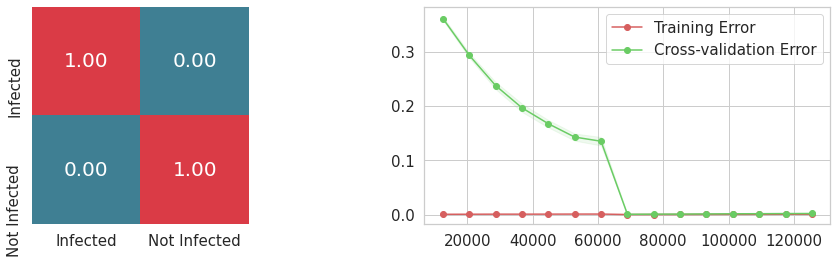

In [59]:
_, Summary_LR = PrintResults(model_rf_final, X_train, y_train, 'Random Forest')
y_train_pred = pd.Series(model_rf_final.predict(X_train), name = 'Infected')
y_test_pred = pd.Series(model_rf_final.predict(X_test), name = "Infected")
print(get_scores(y_test, y_test_pred))

In [60]:
y_test_pred = pd.Series(model_rf_final.predict(X_test), name = "Infected")

In [61]:
y_test_pred_final = pd.DataFrame(y_test_pred)

In [62]:
y_test_pred_final.head()

,Infected
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [63]:
# Random Forest
Priority = pd.DataFrame({'Feature': X_train.columns,'Importance':np.round(model_rf_final.feature_importances_,3)})
Priority  = Priority.sort_values('Importance', ascending = False).set_index('Feature')

In [64]:
Priority.head(15)

,Importance
Feature,
los,0.264
nantibiotics,0.213
nrooms,0.167
surgery.quantity,0.147
age,0.131
charlson_weighted,0.077


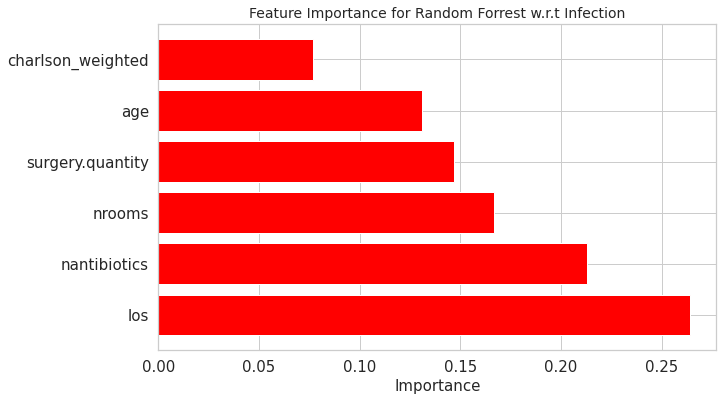

In [65]:
width = 0
fig, ax = plt.subplots(figsize = (10,6))
rects = ax.barh(np.arange(len(Priority)), np.array(Priority.values).reshape(-1), color = 'red')
ax.set_yticks(np.arange(len(Priority)) + ((width)/1))
ax.set_yticklabels(Priority.index, rotation ='horizontal')
ax.set_xlabel("Importance")
ax.set_title("Feature Importance for Random Forrest w.r.t Infection",fontsize = 14);
ax.grid(True)